#6.6. Sourcing and Analysing Time Series

Content:
- Task 2 - Import Libraries and Dateset from quandl
- Task 3 - Make a subset of the dataset and explain the logic followed
- Task 4 - Create a line chart of the data
- Task 5 - Decompose the data's components and analyse the results
- Task 6 - Conduct a Dickey-Fuller test to check for stationarity
- Task 7 - If the data is not stationary, conduct a round of differencing on it
- Task 8 - If the data still isn't stationary, perform another round of differencing
- Task 9 - Check the data's autocorrelations
- Bonus - Repeated for different variables

Task 2 - Import libraries and data set from quandl

In [1]:
#import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#configure API key
quandl.ApiConfig.api_key = '2zxa97zMuaSTDZJt1syL'

In [3]:
#create list of country codes for which the quandl dataset is available to facilitate loading
countries=['ABW','AFG','AFR','AGO','ALB','AND','ARB','ARE','ARG','ARM','ASM','ATG','AUS','AUT','AZE','BDI','BEL','BEN',	'BFA',	'BGD',	'BGR',	'BHR',	'BHS',	'BIH',	'BLR',	'BLZ',	'BMU',	'BOL',	'BRA',	'BRB',	'BRN',	'BTN',	'BWA',	'CAA',	'CAF',	'CAN',	'CEA',	'CEU',	'CHE',	'CHI',	'CHL',	'CHN',	'CIV',	'CLA',	'CME',	'CMR',	'COD',	'COG',	'COL',	'COM',	'CPV',	'CRI',	'CSA',	'CSS',	'CUB',	'CUW',	'CYM',	'CYP',	'CZE',	'DEU',	'DJI',	'DMA',	'DNK',	'DOM',	'DZA',	'EAP',	'EAS',	'ECA',	'ECS',	'ECU',	'EGY',	'EMU',	'ERI',	'ESP',	'EST',	'ETH',	'EUU',	'FIN',	'FJI',	'FRA',	'FRO',	'FSM',	'GAB',	'GBR',	'GEO',	'GHA',	'GIN',	'GMB',	'GNB',	'GNQ',	'GRC',	'GRD',	'GRL',	'GTM',	'GUM',	'GUY',	'HIC',	'HKG',	'HND',	'HPC',	'HRV',	'HTI',	'HUN',	'IDN',	'IMN',	'IND',	'INX',	'IRL',	'IRN',	'IRQ',	'ISL',	'ISR',	'ITA',	'JAM',	'JOR',	'JPN',	'KAZ',	'KEN',	'KGZ',	'KHM',	'KIR',	'KNA',	'KOR',	'KSV',	'KWT',	'LAC',	'LAO',	'LBN',	'LBR',	'LBY',	'LCA',	'LCN',	'LDC',	'LIC',	'LIE',	'LKA',	'LMC',	'LMY',	'LSO',	'LTU',	'LUX',	'LVA',	'MAC',	'MAF',	'MAR',	'MCO',	'MDA',	'MDG',	'MDV',	'MEA',	'MEX',	'MHL',	'MIC',	'MKD',	'MLI',	'MLT',	'MMR',	'MNA',	'MNE',	'MNG',	'MNP',	'MOZ',	'MRT',	'MUS',	'MWI',	'MYS',	'NAC',	'NAF',	'NAM',	'NCL',	'NER',	'NGA',	'NIC',	'NLD',	'NOC',	'NOR',	'NPL',	'NZL',	'OEC',	'OED',	'OMN',	'OSS',	'PAK',	'PAN',	'PER',	'PHL',	'PLW',	'PNG',	'POL',	'PRI',	'PRK',	'PRT',	'PRY',	'PSE',	'PSS',	'PYF',	'QAT',	'ROU',	'RUS',	'RWA',	'SAS',	'SAU',	'SDN',	'SEN',	'SGP',	'SLB',	'SLE',	'SLV',	'SMR',	'SOM',	'SRB',	'SSA',	'SSD',	'SSF',	'SST',	'STP',	'SUR',	'SVK',	'SVN',	'SWE',	'SWZ',	'SXM',	'SXZ',	'SYC',	'SYR',	'TCA',	'TCD',	'TGO',	'THA',	'TJK',	'TKM',	'TLS',	'TON',	'TTO',	'TUN',	'TUR',	'TUV',	'TZA',	'UGA',	'UKR',	'UMC',	'URY',	'USA',	'UZB',	'VCT',	'VEN',	'VIR',	'VNM',	'VUT',	'WLD',	'WSM',	'XZN',	'YEM',	'ZAF',	'ZMB',	'ZWE']

In [4]:
#create list with country codes and suffix of the values to be observed that can be copied and pasted when writing the command to load the dataset
suffix='_PPPPC'
codes=[sub + suffix for sub in countries] 
print ("List in proper method", '[%s]' % ','.join(map(str, codes)))

List in proper method [ABW_PPPPC,AFG_PPPPC,AFR_PPPPC,AGO_PPPPC,ALB_PPPPC,AND_PPPPC,ARB_PPPPC,ARE_PPPPC,ARG_PPPPC,ARM_PPPPC,ASM_PPPPC,ATG_PPPPC,AUS_PPPPC,AUT_PPPPC,AZE_PPPPC,BDI_PPPPC,BEL_PPPPC,BEN_PPPPC,BFA_PPPPC,BGD_PPPPC,BGR_PPPPC,BHR_PPPPC,BHS_PPPPC,BIH_PPPPC,BLR_PPPPC,BLZ_PPPPC,BMU_PPPPC,BOL_PPPPC,BRA_PPPPC,BRB_PPPPC,BRN_PPPPC,BTN_PPPPC,BWA_PPPPC,CAA_PPPPC,CAF_PPPPC,CAN_PPPPC,CEA_PPPPC,CEU_PPPPC,CHE_PPPPC,CHI_PPPPC,CHL_PPPPC,CHN_PPPPC,CIV_PPPPC,CLA_PPPPC,CME_PPPPC,CMR_PPPPC,COD_PPPPC,COG_PPPPC,COL_PPPPC,COM_PPPPC,CPV_PPPPC,CRI_PPPPC,CSA_PPPPC,CSS_PPPPC,CUB_PPPPC,CUW_PPPPC,CYM_PPPPC,CYP_PPPPC,CZE_PPPPC,DEU_PPPPC,DJI_PPPPC,DMA_PPPPC,DNK_PPPPC,DOM_PPPPC,DZA_PPPPC,EAP_PPPPC,EAS_PPPPC,ECA_PPPPC,ECS_PPPPC,ECU_PPPPC,EGY_PPPPC,EMU_PPPPC,ERI_PPPPC,ESP_PPPPC,EST_PPPPC,ETH_PPPPC,EUU_PPPPC,FIN_PPPPC,FJI_PPPPC,FRA_PPPPC,FRO_PPPPC,FSM_PPPPC,GAB_PPPPC,GBR_PPPPC,GEO_PPPPC,GHA_PPPPC,GIN_PPPPC,GMB_PPPPC,GNB_PPPPC,GNQ_PPPPC,GRC_PPPPC,GRD_PPPPC,GRL_PPPPC,GTM_PPPPC,GUM_PPPPC,GUY_PPPPC,HIC_PPPPC,HKG_PPP

In [5]:
#load quandl dataset - Per Capita GDP based on PPP Valuation, USD from the IMF Crosscountry Macroeconomics Statistics
data=quandl.get_table('QDL/ODA', indicator='ABW_PPPPC,AFG_PPPPC,AFR_PPPPC,AGO_PPPPC,ALB_PPPPC,AND_PPPPC,ARB_PPPPC,ARE_PPPPC,ARG_PPPPC,ARM_PPPPC,ASM_PPPPC,ATG_PPPPC,AUS_PPPPC,AUT_PPPPC,AZE_PPPPC,BDI_PPPPC,BEL_PPPPC,BEN_PPPPC,BFA_PPPPC,BGD_PPPPC,BGR_PPPPC,BHR_PPPPC,BHS_PPPPC,BIH_PPPPC,BLR_PPPPC,BLZ_PPPPC,BMU_PPPPC,BOL_PPPPC,BRA_PPPPC,BRB_PPPPC,BRN_PPPPC,BTN_PPPPC,BWA_PPPPC,CAA_PPPPC,CAF_PPPPC,CAN_PPPPC,CEA_PPPPC,CEU_PPPPC,CHE_PPPPC,CHI_PPPPC,CHL_PPPPC,CHN_PPPPC,CIV_PPPPC,CLA_PPPPC,CME_PPPPC,CMR_PPPPC,COD_PPPPC,COG_PPPPC,COL_PPPPC,COM_PPPPC,CPV_PPPPC,CRI_PPPPC,CSA_PPPPC,CSS_PPPPC,CUB_PPPPC,CUW_PPPPC,CYM_PPPPC,CYP_PPPPC,CZE_PPPPC,DEU_PPPPC,DJI_PPPPC,DMA_PPPPC,DNK_PPPPC,DOM_PPPPC,DZA_PPPPC,EAP_PPPPC,EAS_PPPPC,ECA_PPPPC,ECS_PPPPC,ECU_PPPPC,EGY_PPPPC,EMU_PPPPC,ERI_PPPPC,ESP_PPPPC,EST_PPPPC,ETH_PPPPC,EUU_PPPPC,FIN_PPPPC,FJI_PPPPC,FRA_PPPPC,FRO_PPPPC,FSM_PPPPC,GAB_PPPPC,GBR_PPPPC,GEO_PPPPC,GHA_PPPPC,GIN_PPPPC,GMB_PPPPC,GNB_PPPPC,GNQ_PPPPC,GRC_PPPPC,GRD_PPPPC,GRL_PPPPC,GTM_PPPPC,GUM_PPPPC,GUY_PPPPC,HIC_PPPPC,HKG_PPPPC,HND_PPPPC,HPC_PPPPC,HRV_PPPPC,HTI_PPPPC,HUN_PPPPC,IDN_PPPPC,IMN_PPPPC,IND_PPPPC,INX_PPPPC,IRL_PPPPC,IRN_PPPPC,IRQ_PPPPC,ISL_PPPPC,ISR_PPPPC,ITA_PPPPC,JAM_PPPPC,JOR_PPPPC,JPN_PPPPC,KAZ_PPPPC,KEN_PPPPC,KGZ_PPPPC,KHM_PPPPC,KIR_PPPPC,KNA_PPPPC,KOR_PPPPC,KSV_PPPPC,KWT_PPPPC,LAC_PPPPC,LAO_PPPPC,LBN_PPPPC,LBR_PPPPC,LBY_PPPPC,LCA_PPPPC,LCN_PPPPC,LDC_PPPPC,LIC_PPPPC,LIE_PPPPC,LKA_PPPPC,LMC_PPPPC,LMY_PPPPC,LSO_PPPPC,LTU_PPPPC,LUX_PPPPC,LVA_PPPPC,MAC_PPPPC,MAF_PPPPC,MAR_PPPPC,MCO_PPPPC,MDA_PPPPC,MDG_PPPPC,MDV_PPPPC,MEA_PPPPC,MEX_PPPPC,MHL_PPPPC,MIC_PPPPC,MKD_PPPPC,MLI_PPPPC,MLT_PPPPC,MMR_PPPPC,MNA_PPPPC,MNE_PPPPC,MNG_PPPPC,MNP_PPPPC,MOZ_PPPPC,MRT_PPPPC,MUS_PPPPC,MWI_PPPPC,MYS_PPPPC,NAC_PPPPC,NAF_PPPPC,NAM_PPPPC,NCL_PPPPC,NER_PPPPC,NGA_PPPPC,NIC_PPPPC,NLD_PPPPC,NOC_PPPPC,NOR_PPPPC,NPL_PPPPC,NZL_PPPPC,OEC_PPPPC,OED_PPPPC,OMN_PPPPC,OSS_PPPPC,PAK_PPPPC,PAN_PPPPC,PER_PPPPC,PHL_PPPPC,PLW_PPPPC,PNG_PPPPC,POL_PPPPC,PRI_PPPPC,PRK_PPPPC,PRT_PPPPC,PRY_PPPPC,PSE_PPPPC,PSS_PPPPC,PYF_PPPPC,QAT_PPPPC,ROU_PPPPC,RUS_PPPPC,RWA_PPPPC,SAS_PPPPC,SAU_PPPPC,SDN_PPPPC,SEN_PPPPC,SGP_PPPPC,SLB_PPPPC,SLE_PPPPC,SLV_PPPPC,SMR_PPPPC,SOM_PPPPC,SRB_PPPPC,SSA_PPPPC,SSD_PPPPC,SSF_PPPPC,SST_PPPPC,STP_PPPPC,SUR_PPPPC,SVK_PPPPC,SVN_PPPPC,SWE_PPPPC,SWZ_PPPPC,SXM_PPPPC,SXZ_PPPPC,SYC_PPPPC,SYR_PPPPC,TCA_PPPPC,TCD_PPPPC,TGO_PPPPC,THA_PPPPC,TJK_PPPPC,TKM_PPPPC,TLS_PPPPC,TON_PPPPC,TTO_PPPPC,TUN_PPPPC,TUR_PPPPC,TUV_PPPPC,TZA_PPPPC,UGA_PPPPC,UKR_PPPPC,UMC_PPPPC,URY_PPPPC,USA_PPPPC,UZB_PPPPC,VCT_PPPPC,VEN_PPPPC,VIR_PPPPC,VNM_PPPPC,VUT_PPPPC,WLD_PPPPC,WSM_PPPPC,XZN_PPPPC,YEM_PPPPC,ZAF_PPPPC,ZMB_PPPPC,ZWE_PPPPC')

In [6]:
data.head()

,indicator,date,value
None,,,
0,ZWE_PPPPC,2028-12-31,3026.144
1,ZWE_PPPPC,2027-12-31,2938.463
2,ZWE_PPPPC,2026-12-31,2855.894
3,ZWE_PPPPC,2025-12-31,2776.765
4,ZWE_PPPPC,2024-12-31,2702.745


In [7]:
data.shape

(9457, 3)

In [8]:
data.columns

Index(['indicator', 'date', 'value'], dtype='object')

Task 3 - Make a subset of the data set and explain the logic followed

In [9]:
#create subset of data with only records between 1990 and november 2023
data_sub = data.loc[(data['date'] >= '1990-01-01') & (data['date'] < '2023-11-30')]

In [10]:
data_sub.head()

,indicator,date,value
None,,,
6,ZWE_PPPPC,2022-12-31,2522.949
7,ZWE_PPPPC,2021-12-31,2336.388
8,ZWE_PPPPC,2020-12-31,2102.634
9,ZWE_PPPPC,2019-12-31,2294.623
10,ZWE_PPPPC,2018-12-31,2444.432


In [11]:
data_sub.shape

(6369, 3)

In [12]:
data_sub['avg_value'] = data_sub.groupby(['date'])['value'].transform(np.mean)
data_sub.head()

,indicator,date,value,avg_value
None,,,,
6,ZWE_PPPPC,2022-12-31,2522.949,25747.308268
7,ZWE_PPPPC,2021-12-31,2336.388,23365.584968
8,ZWE_PPPPC,2020-12-31,2102.634,21016.143448
9,ZWE_PPPPC,2019-12-31,2294.623,22354.671120
10,ZWE_PPPPC,2018-12-31,2444.432,21750.663552


The main dataset of my analysis contains only (daily) data from 2023. Since the existing data for only 2023 would not be enough to conduct a time series analysis and data that is particularly old would not be relevant to cross-check with the main data, I have settled for analyzing the past thirty years as a period of time that would not be too distant but that could still provide enough insight. Since the data did not include a worldwide value, I have created an aggregated version by date to facilitate this first analysis - later on it might make sense to explore specific countries.

In [13]:
#set the date column as the index
from datetime import datetime
data_sub['datetime']=pd.to_datetime(data_sub['date']) #creates a datetime column from 'date'
data_sub=data_sub.set_index('datetime') #sets the datetime as the index of the dataframe
data_sub.drop(['date'], axis=1, inplace=True) #drops the 'date' column

In [14]:
#drop indicator column and original value columns
data_sub.drop(['indicator','value'],axis=1,inplace=True)

In [15]:
data_sub.head()

,avg_value
datetime,
2022-12-31,25747.308268
2021-12-31,23365.584968
2020-12-31,21016.143448
2019-12-31,22354.671120
2018-12-31,21750.663552


In [16]:
data_sub.shape

(6369, 1)

In [17]:
#check for duplicates
dups=data_sub.duplicated()
dups.sum()

6336

In [18]:
data_sub=data_sub.drop_duplicates()

In [19]:
data_sub.shape

(33, 1)

Reducing the dataset to only the world-wide average values for each year leaves us with a very reduced number of observations, which might limit the validity of the analysis.

Task 4 - Create a line chart of the data

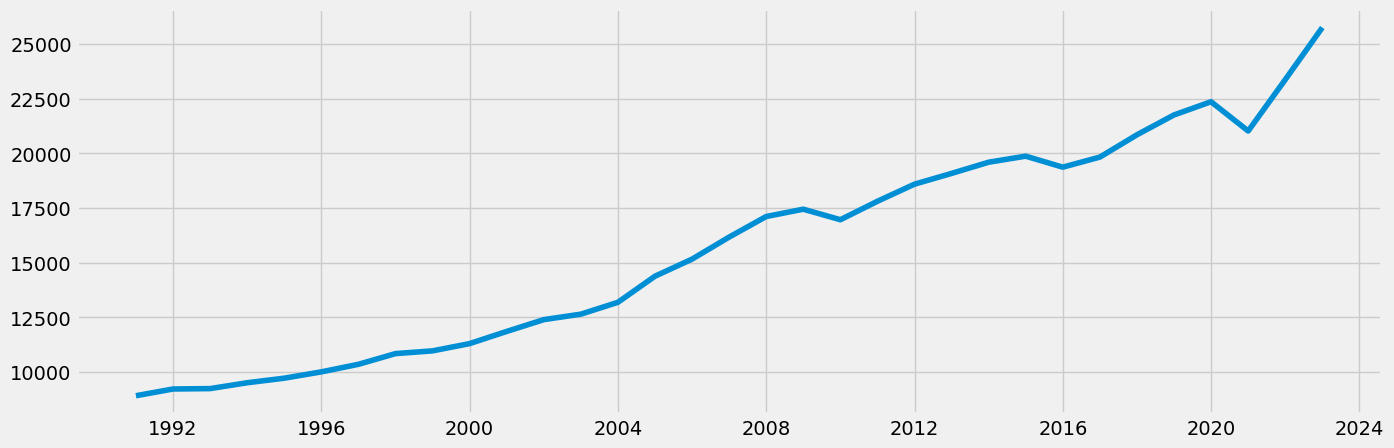

In [20]:
#plot the new dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

Task 5 - Decompose the data's components and analyse the results

In [21]:
#decompose the time series through an additive model
decomposition=sm.tsa.seasonal_decompose(data_sub,model='additive')

In [22]:
#define a fixed size for all special charts
from pylab import rcParams
rcParams['figure.figsize']=18,7

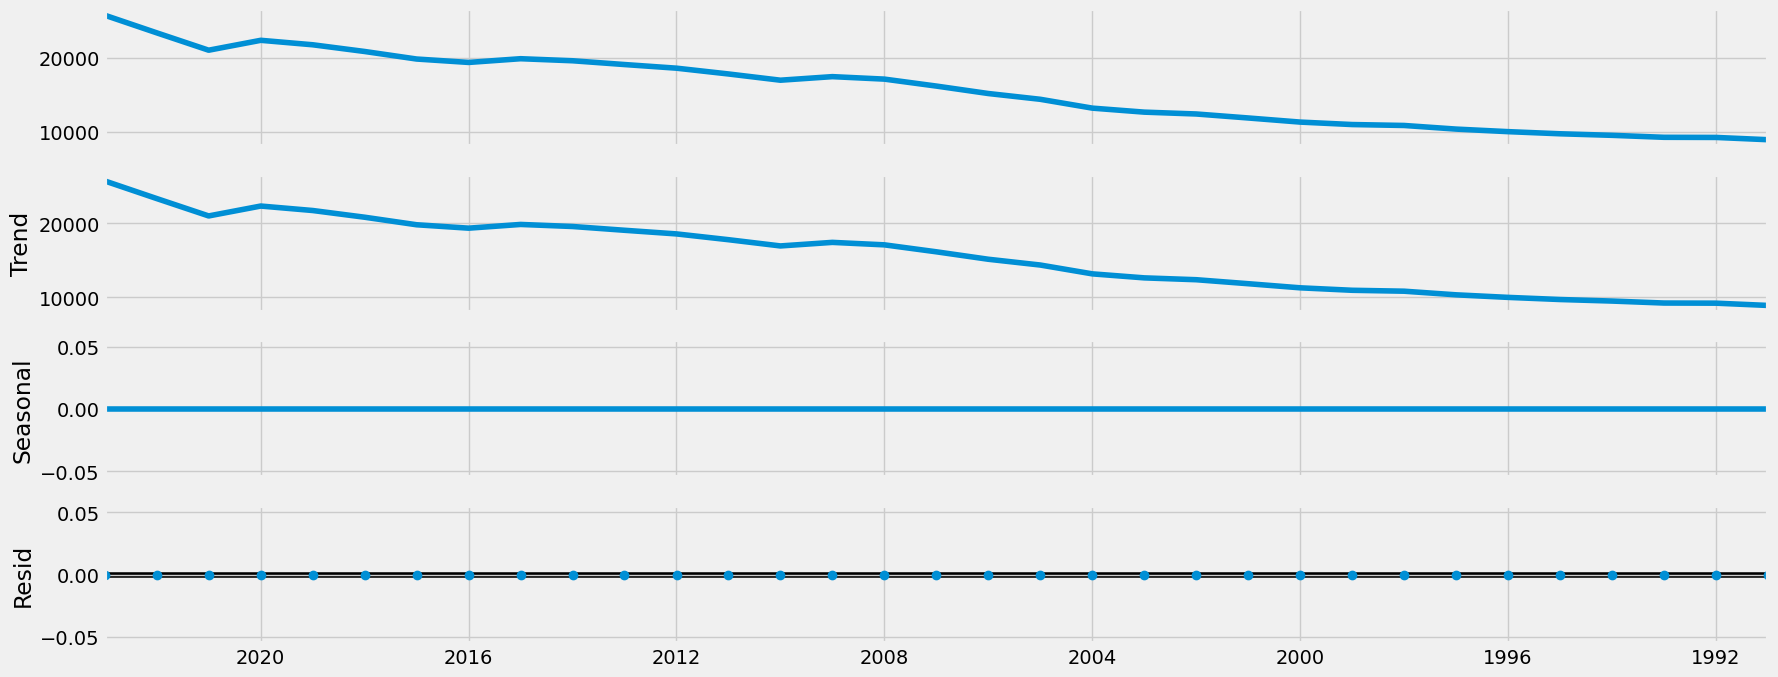

In [23]:
#plot the separate components
decomposition.plot()
plt.show()

The data has an underlying downward trend. Since there isn't much noise, the level and the trend look similar. The seasonality line looks flat, suggesting a lack of seasonality in this data. There does not seem to be much or any unresolved noise.

Task 6 - Conduct a Dickey-Fuller test to check for stationarity

In [24]:
#check for stationarity using dickey fuller test
from statsmodels.tsa.stattools import adfuller #imports the adfuller() function
def dickey_fuller(timeseries): #defines the function
    #performsthe dickey-fuller test:
    print('Dickey-Fuller Stationarity test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key]=value
    print(result)
#applies the test using the function on the time series
dickey_fuller(data_sub['avg_value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.475159
p-value                         0.896773
Number of Lags Used             6.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


The null hypothesis being the presence of a unit root (we want to disprove that there is a unit root, which would mean the data is stationary), the critical value being smaller than the test statistic means we cannot reject the null hypothesis and that this data is non-stationary.

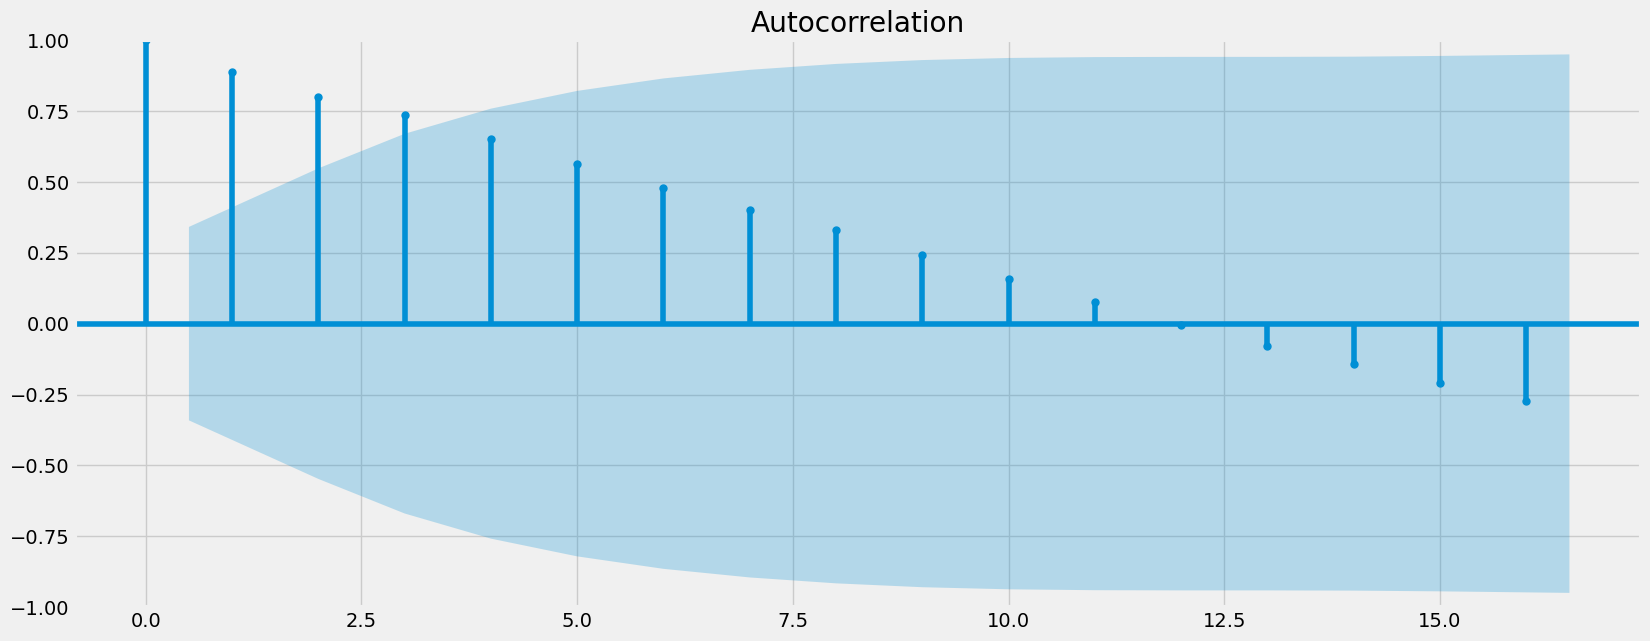

In [25]:
#check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #imports the autocorrelation and partial correlation plots
plot_acf(data_sub)
plt.show()

Vertical lines represent the lags in the series, the blue area represents the confidence interval. Lines going above the blue edge of the confidence interval means they are significantly correlated with each other. A large amount of lags beyond this interval leads to a deducion that the data is non-stationary. In this case, there are several lags correlated with each other, showing that there is autocorrelation in the data. This further supports the assertion that the dataset is non-stationary, corroborating the Dickey-Fuller test results.

Task 7 - If the data is not stationary, conduct a round of differencing on it

In [26]:
#calculate difference between every value and its lag and store the results in a new df
data_diff=data_sub-data_sub.shift(1)

In [27]:
#remove any missing values resulting from the subtraction
data_diff.dropna(inplace=True)

In [28]:
data_diff.head()

,avg_value
datetime,
2021-12-31,-2381.723300
2020-12-31,-2349.441521
2019-12-31,1338.527672
2018-12-31,-604.007568
2017-12-31,-907.840604


In [29]:
data_diff.columns

Index(['avg_value'], dtype='object')

In [30]:
data_diff.shape

(32, 1)

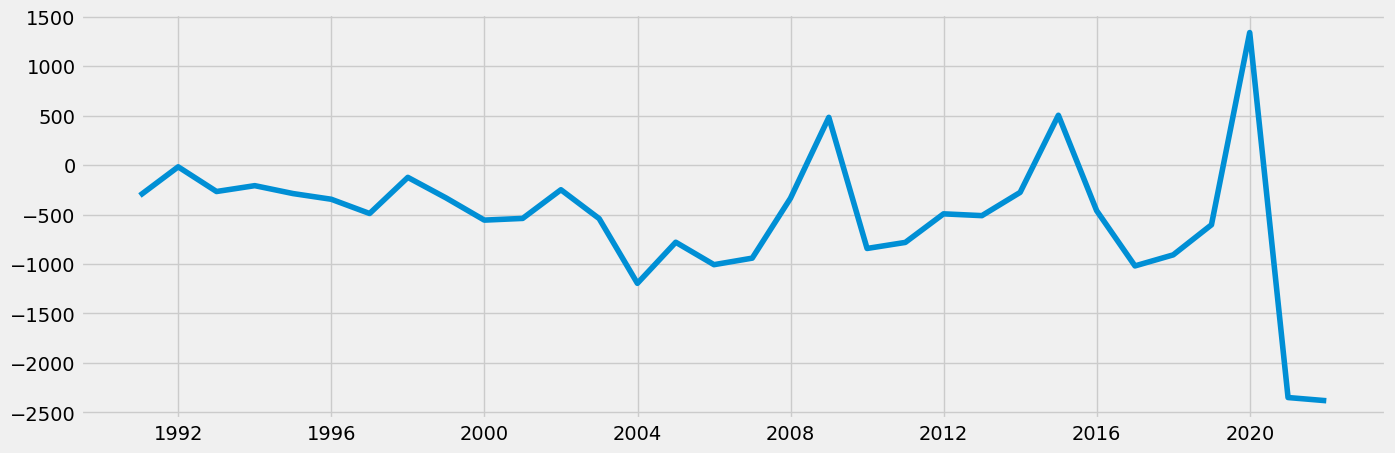

In [31]:
#plot time series curve of dataset after differencing
plt.figure(figsize=(15,5),dpi=100)
plt.plot(data_diff)

In [32]:
#check for stationarity using dickey fuller test
from statsmodels.tsa.stattools import adfuller #imports the adfuller() function
def dickey_fuller(timeseries): #defines the function
    #performsthe dickey-fuller test:
    print('Dickey-Fuller Stationarity test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key]=value
    print(result)
#applies the test using the function on the time series
dickey_fuller(data_diff['avg_value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.695410
p-value                         0.847935
Number of Lags Used            10.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


Task 8 - If the data still isn't stationary, perform another round of differencing

In [33]:
#calculate difference between every value and its lag and store the results in a new df
data_diff_2=data_diff-data_diff.shift(1)

In [34]:
#remove any missing values resulting from the subtraction
data_diff_2.dropna(inplace=True)

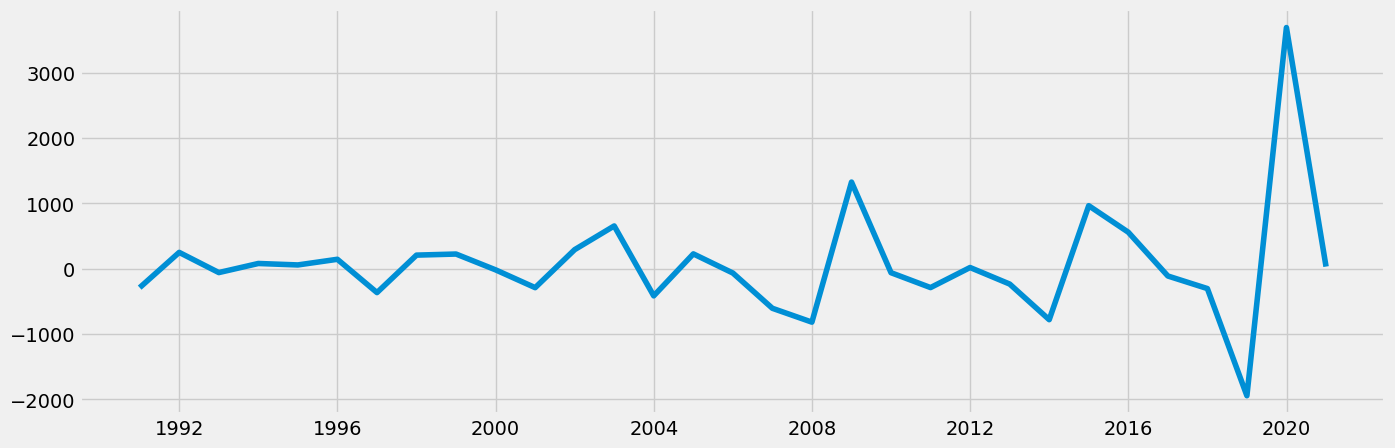

In [35]:
#plot time series curve of dataset after differencing
plt.figure(figsize=(15,5),dpi=100)
plt.plot(data_diff_2)

In [36]:
#check for stationarity using dickey fuller test
from statsmodels.tsa.stattools import adfuller #imports the adfuller() function
def dickey_fuller(timeseries): #defines the function
    #performsthe dickey-fuller test:
    print('Dickey-Fuller Stationarity test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key]=value
    print(result)
#applies the test using the function on the time series
dickey_fuller(data_diff_2['avg_value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.165818
p-value                         0.218884
Number of Lags Used             9.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [37]:
#calculate difference between every value and its lag and store the results in a new df
data_diff_3=data_diff_2-data_diff_2.shift(1)

In [38]:
#remove any missing values resulting from the subtraction
data_diff_3.dropna(inplace=True)

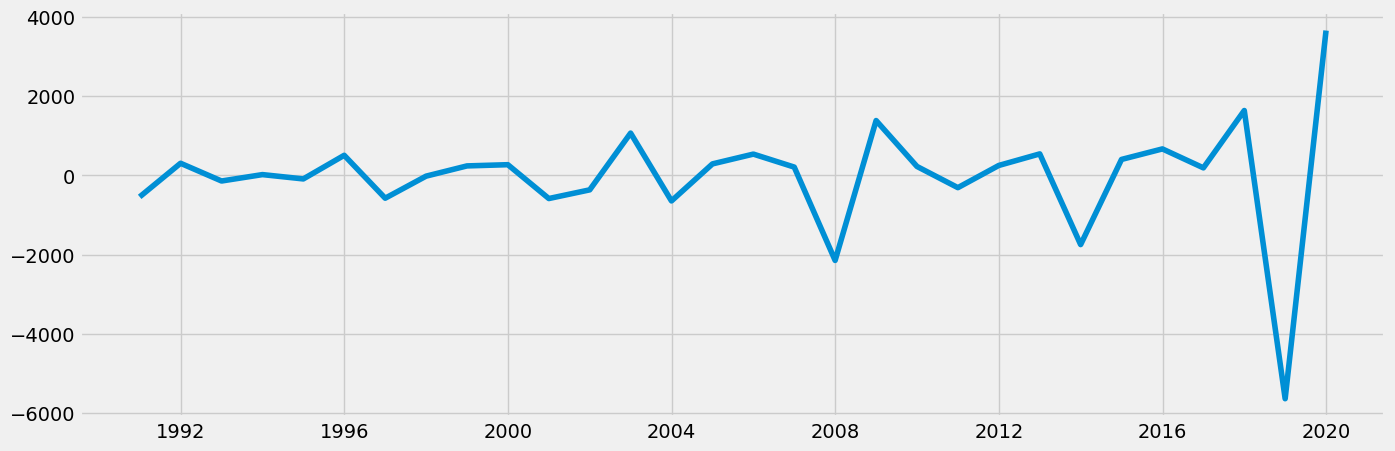

In [39]:
#plot time series curve of dataset after differencing
plt.figure(figsize=(15,5),dpi=100)
plt.plot(data_diff_3)

In [40]:
#check for stationarity using dickey fuller test
from statsmodels.tsa.stattools import adfuller #imports the adfuller() function
def dickey_fuller(timeseries): #defines the function
    #performsthe dickey-fuller test:
    print('Dickey-Fuller Stationarity test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key]=value
    print(result)
#applies the test using the function on the time series
dickey_fuller(data_diff_3['avg_value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.057626
p-value                         0.029852
Number of Lags Used             9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


After 3 rounds of differencing, the test statistic is now smaller than the critical value at 5 and 10 percent significance levels, with a satisfactory p-value, meaning we can now consider the series to be stationary.

Task 9 - Check the data's autocorrelations

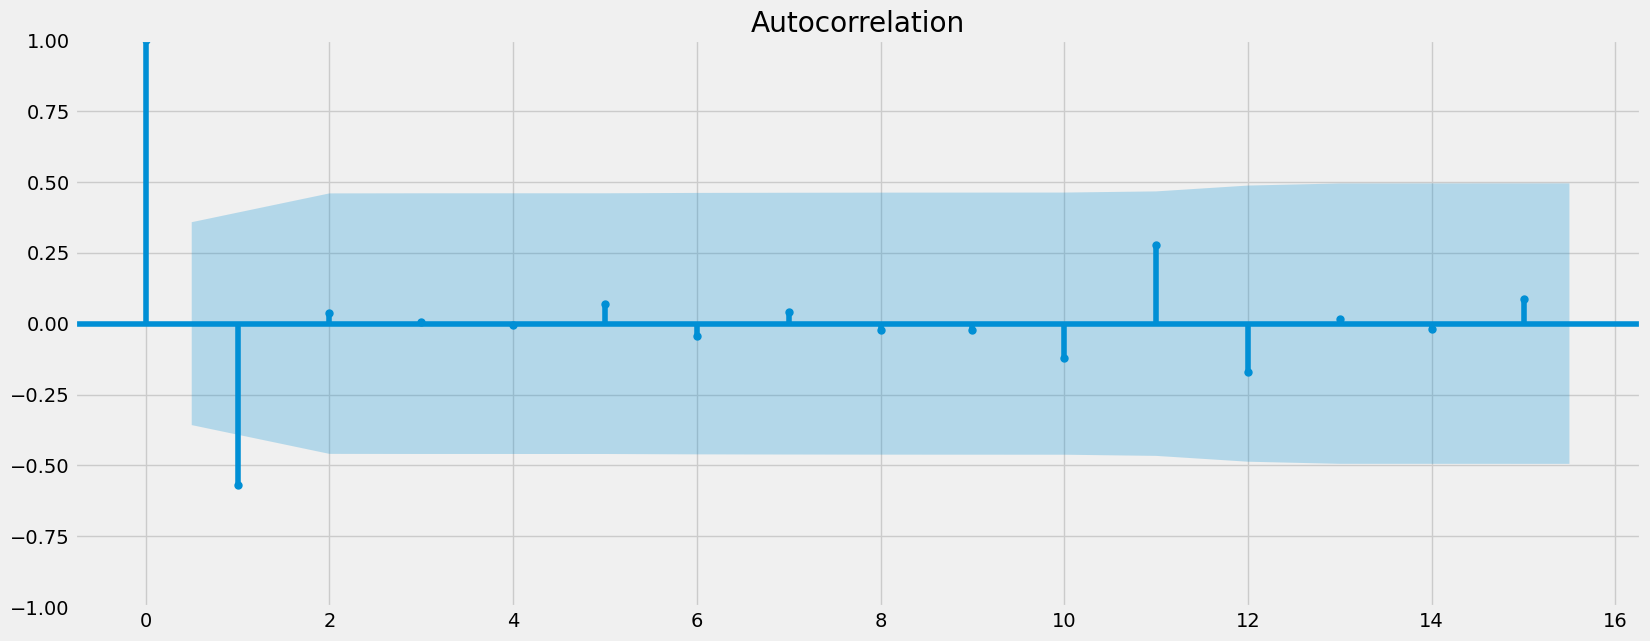

In [41]:
#check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #imports the autocorrelation and partial correlation plots
plot_acf(data_diff_3)
plt.show()

There are only two instances of autocorrelation. Nonetheless, in a small dataset like the one used, this might still be relevant.

**Bonus** - Repeated for variable in main dataset used in the Achievement

In [42]:
#set path
path = r'C:\Users\EliteMini HX90\OneDrive\Documents\CareerFoundry\Achievement_6'

In [43]:
#import dataset
df=pd.read_pickle(os.path.join(path,'02_Data','02_Prepared_Data','trending_yt_videos_full_checked.pkl'))

In [44]:
df.head()

,title,channel_name,daily_rank,daily_movement,weekly_movement,snapshot_date,country,view_count,like_count,comment_count,description,thumbnail_url,video_id,channel_id,video_tags,kind,publish_date,language
0,"Freeman HKD, Nox, Tyfah Guni - Man To Man (Off...",FreemanHKDVEVO,1,0,0,2023-11-29,ZW,659445,12525,1154,Produced By: Spirit Fingerz\nMixed &Mastered B...,https://i.ytimg.com/vi/nOjbJdw2dPs/mqdefault.jpg,nOjbJdw2dPs,UCBqFAZ41zHq5h5-7A1YpiuQ,"Freeman, HKD, Nox, Tyfah, Guni, Man, (Official...",youtube#video,2023-11-02 00:00:00+00:00,nan
1,Nutty O - Jericho ft. BLING4 & Bagga,NuttyOVEVO,2,0,48,2023-11-29,ZW,96852,6361,795,Jericho\nby Nutty O (feat. BLING4 & Bagga) \nP...,https://i.ytimg.com/vi/7g71VmQzyD4/mqdefault.jpg,7g71VmQzyD4,UCwY1uVRu0ML4wWBm9pGZy_g,"Jericho, BLING4, Bagga, Ragga-Soca, reggae, po...",youtube#video,2023-11-23 00:00:00+00:00,nan
2,"Kamo Mphela, Khalil Harrison & Tyler ICU - Dal...",Kamo Mphelaxx,3,0,47,2023-11-29,ZW,1236824,41518,1290,"The Official Music Video for Kamo Mphela, Khal...",https://i.ytimg.com/vi/hcqcy6cdCw8/mqdefault.jpg,hcqcy6cdCw8,UCfYbXQVQZYoISJzqBdH15Eg,"kamo mphela, tyler icu, dalie, Mnike, Amapiano...",youtube#video,2023-11-22 00:00:00+00:00,nan
3,Garnacho UNBELIEVABLE Overhead Kick! 🤩 | Evert...,Manchester United,4,1,46,2023-11-29,ZW,6607439,153575,5580,United picked up 3️⃣ points at Goodison Park o...,https://i.ytimg.com/vi/qgmhQZzoy1s/mqdefault.jpg,qgmhQZzoy1s,UC6yW44UGJJBvYTlfC7CRg2Q,"manchester united, mufc, man utd, manutd, mu, ...",youtube#video,2023-11-26 00:00:00+00:00,en-GB
4,Drake - First Person Shooter ft. J. Cole,DrakeVEVO,5,-1,-3,2023-11-29,ZW,19193308,858667,36413,Listen to For All The Dogs Scary Hours Edition...,https://i.ytimg.com/vi/Xty2gi5cMa8/mqdefault.jpg,Xty2gi5cMa8,UCQznUf1SjfDqx65hX3zRDiA,"Drake, First, Person, Shooter, OVO/Republic, H...",youtube#video,2023-11-15 00:00:00+00:00,en


In [45]:
#create subset with only snapshot_date and view_count 
df_sub=df[['snapshot_date','view_count']]
df_sub.head()

,snapshot_date,view_count
0,2023-11-29,659445
1,2023-11-29,96852
2,2023-11-29,1236824
3,2023-11-29,6607439
4,2023-11-29,19193308


In [46]:
#create column with the sum of all the views of that day
df_sub['total_views'] = df_sub.groupby(['snapshot_date'])['view_count'].transform(np.sum)
df_sub.head()

,snapshot_date,view_count,total_views
0,2023-11-29,659445,49493219568
1,2023-11-29,96852,49493219568
2,2023-11-29,1236824,49493219568
3,2023-11-29,6607439,49493219568
4,2023-11-29,19193308,49493219568


In [47]:
#drop original channel_id and view_count columns
df_sub.drop(['view_count'],axis=1,inplace=True)

In [48]:
df_sub.head()

,snapshot_date,total_views
0,2023-11-29,49493219568
1,2023-11-29,49493219568
2,2023-11-29,49493219568
3,2023-11-29,49493219568
4,2023-11-29,49493219568


In [49]:
df_sub.dtypes

snapshot_date    object
total_views       int64
dtype: object

In [50]:
#convert the date column to a date format
df_sub['snapshot_date'] = pd.to_datetime(df_sub['snapshot_date'])

In [51]:
df_sub.shape

(197757, 2)

In [52]:
#check for missing values
df_sub.isnull().sum()

snapshot_date    0
total_views      0
dtype: int64

In [53]:
#check for duplicates
dups=df_sub.duplicated()
dups.sum()

197722

In [54]:
df_sub=df_sub.drop_duplicates()

In [55]:
df_sub.shape

(35, 2)

In [56]:
#set the date column as the index
from datetime import datetime
df_sub['datetime']=pd.to_datetime(df_sub['snapshot_date']) #creates a datetime column from 'date'
df_sub=df_sub.set_index('datetime') #sets the datetime as the index of the dataframe
df_sub.drop(['snapshot_date'], axis=1, inplace=True) #drops the 'date' column

In [57]:
df_sub.head()

,total_views
datetime,
2023-11-29,49493219568
2023-11-28,45257605910
2023-11-27,39624640230
2023-11-26,40992134239
2023-11-25,42071129793


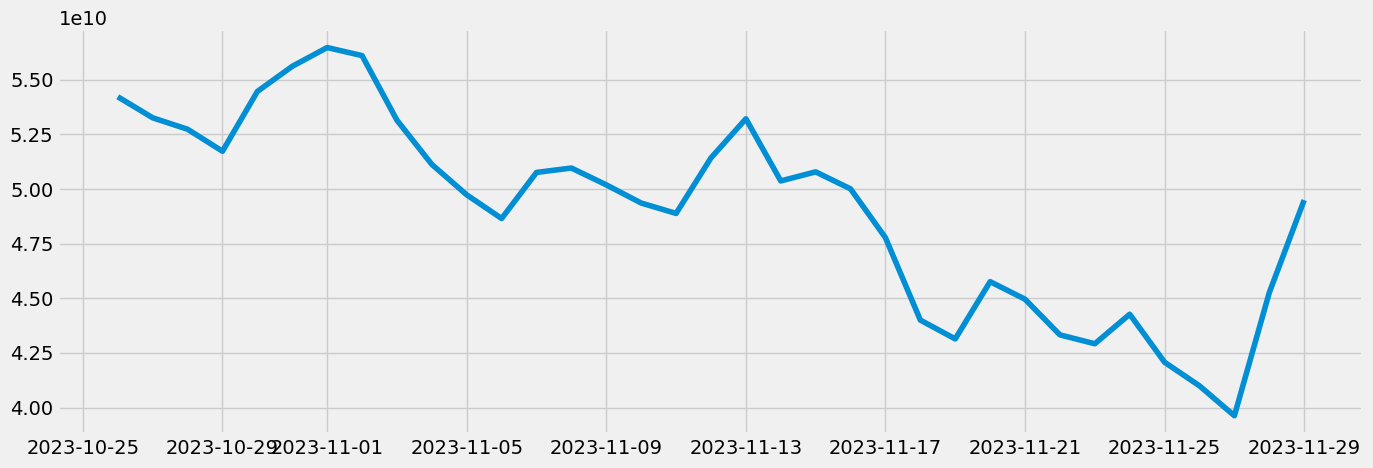

In [58]:
#plot the dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [59]:
#decompose the time series through an additive model
decomposition_2=sm.tsa.seasonal_decompose(df_sub,model='additive')

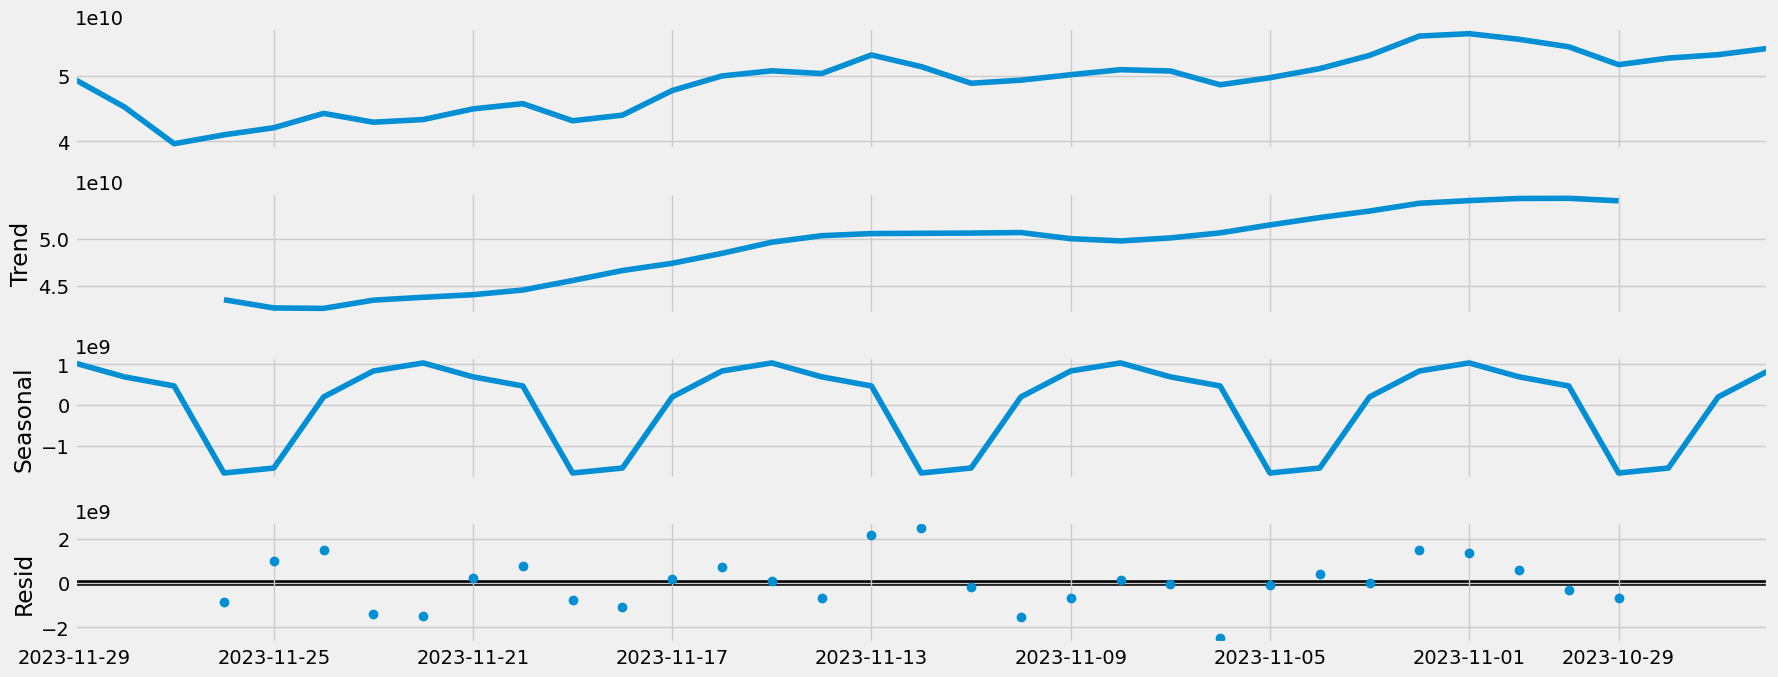

In [60]:
#plot the separate components
decomposition_2.plot()
plt.show()

In [61]:
#check for stationarity using dickey fuller test
from statsmodels.tsa.stattools import adfuller #imports the adfuller() function
def dickey_fuller(timeseries): #defines the function
    #performsthe dickey-fuller test:
    print('Dickey-Fuller Stationarity test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key]=value
    print(result)
#applies the test using the function on the time series
dickey_fuller(df_sub['total_views'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.603289
p-value                         0.481941
Number of Lags Used             1.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


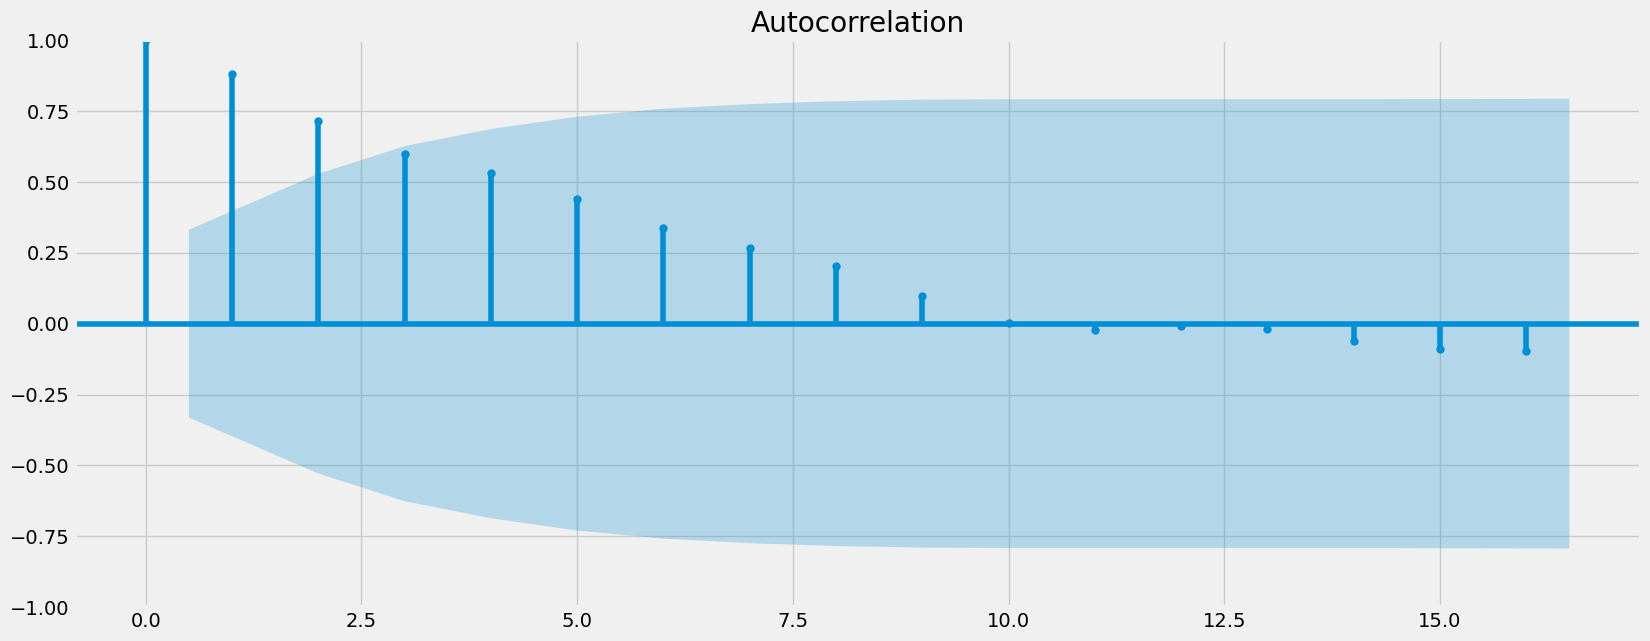

In [62]:
#check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #imports the autocorrelation and partial correlation plots
plot_acf(df_sub)
plt.show()

In [63]:
#calculate difference between every value and its lag and store the results in a new df
df_diff=df_sub-df_sub.shift(1)

In [64]:
#remove any missing values resulting from the subtraction
df_diff.dropna(inplace=True)

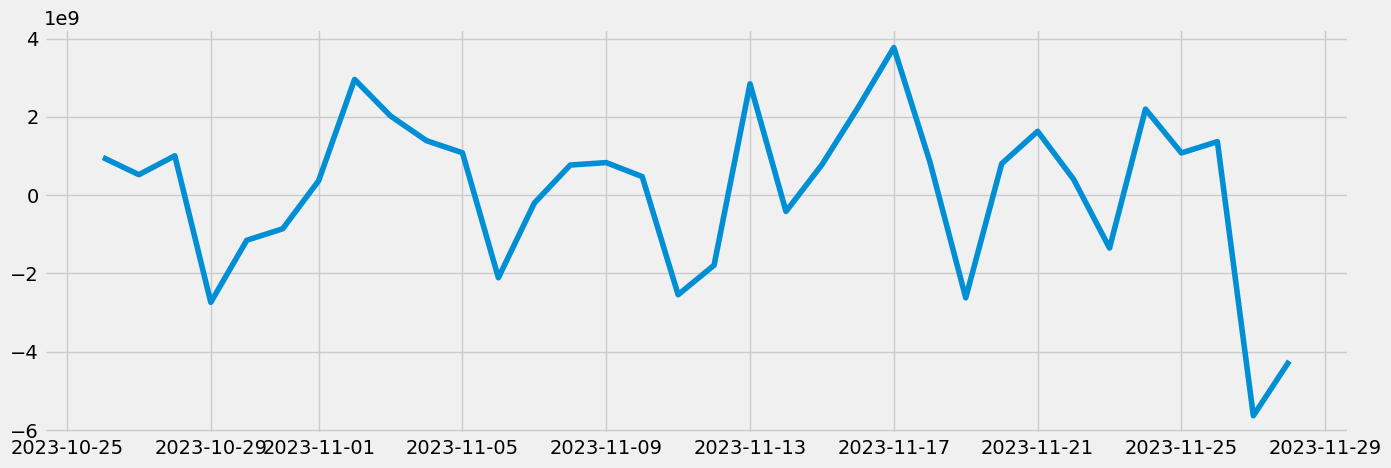

In [65]:
#plot time series curve of dataset after differencing
plt.figure(figsize=(15,5),dpi=100)
plt.plot(df_diff)

In [66]:
#check for stationarity using dickey fuller test
from statsmodels.tsa.stattools import adfuller #imports the adfuller() function
def dickey_fuller(timeseries): #defines the function
    #performsthe dickey-fuller test:
    print('Dickey-Fuller Stationarity test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key]=value
    print(result)
#applies the test using the function on the time series
dickey_fuller(df_diff['total_views'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.869330
p-value                         0.049033
Number of Lags Used             9.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [67]:
#calculate difference between every value and its lag and store the results in a new df
df_diff_2=df_diff-df_diff.shift(1)

In [68]:
#remove any missing values resulting from the subtraction
df_diff_2.dropna(inplace=True)

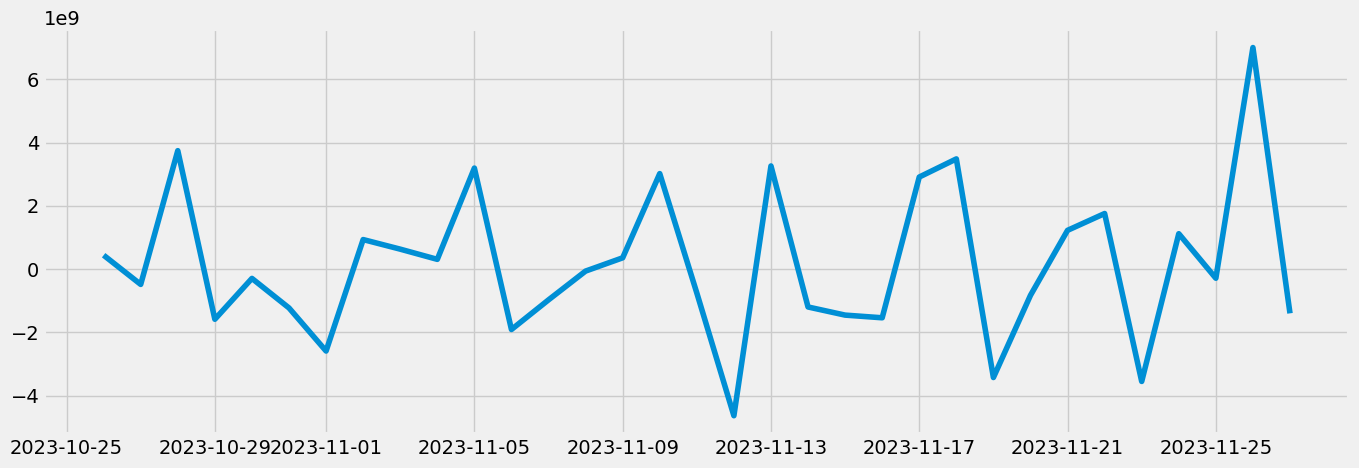

In [69]:
#plot time series curve of dataset after differencing
plt.figure(figsize=(15,5),dpi=100)
plt.plot(df_diff_2)

In [70]:
#check for stationarity using dickey fuller test
from statsmodels.tsa.stattools import adfuller #imports the adfuller() function
def dickey_fuller(timeseries): #defines the function
    #performsthe dickey-fuller test:
    print('Dickey-Fuller Stationarity test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key]=value
    print(result)
#applies the test using the function on the time series
dickey_fuller(df_diff_2['total_views'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.647039
p-value                         0.458585
Number of Lags Used             9.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [71]:
#calculate difference between every value and its lag and store the results in a new df
df_diff_3=df_diff_2-df_diff_2.shift(1)

In [72]:
#remove any missing values resulting from the subtraction
df_diff_3.dropna(inplace=True)

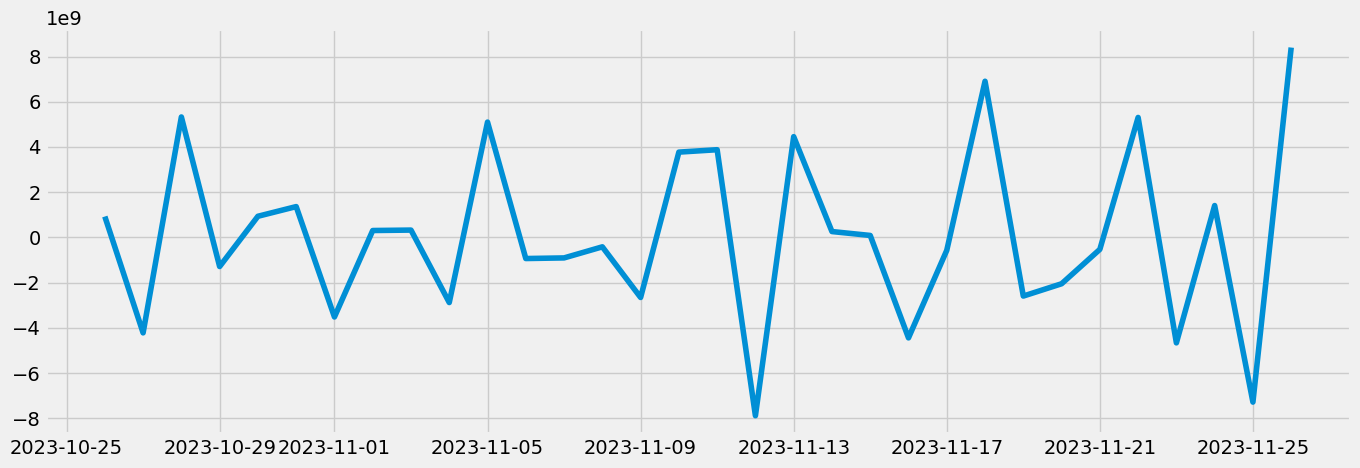

In [73]:
#plot time series curve of dataset after differencing
plt.figure(figsize=(15,5),dpi=100)
plt.plot(df_diff_3)

In [74]:
#check for stationarity using dickey fuller test
from statsmodels.tsa.stattools import adfuller #imports the adfuller() function
def dickey_fuller(timeseries): #defines the function
    #performsthe dickey-fuller test:
    print('Dickey-Fuller Stationarity test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key]=value
    print(result)
#applies the test using the function on the time series
dickey_fuller(df_diff_3['total_views'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.509352
p-value                         0.000189
Number of Lags Used             6.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


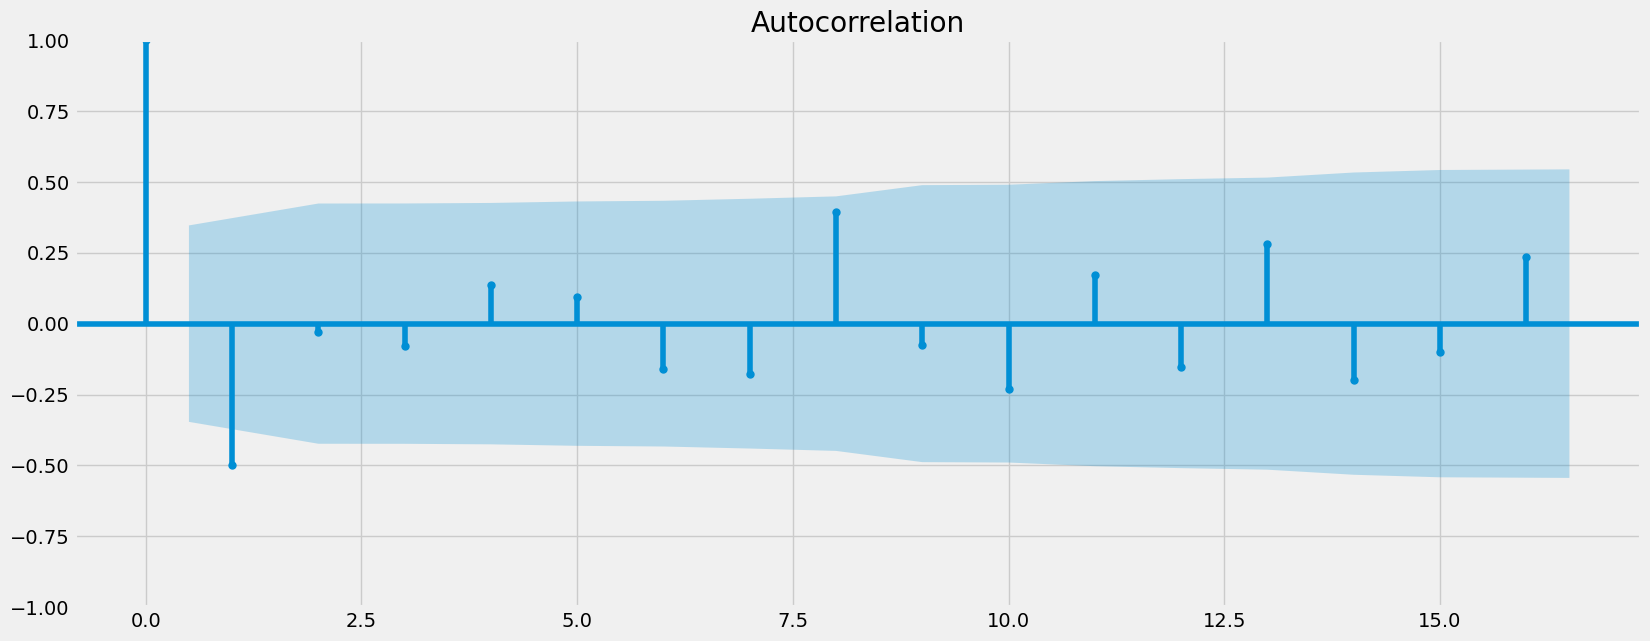

In [75]:
#check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #imports the autocorrelation and partial correlation plots
plot_acf(df_diff_3)
plt.show()